## Course Project

**Instructions:** <br>
a. In the course project, you will analyze a real-world dataset on housing sale price prediction. You will write a report on your data analysis using Jupyter Notebook. <br>
b. For each step, make sure to explain what you are doing, annotate your results, and provide your interpretation. <br>
c. When you finish, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your project report. <br>
d. Upload your .ipynb file to Canvas for grading. <br>
e. All questions related to the course project shall be posted in the Discussions section on Canvas. <br>
<br>


### Housing Sale Price Prediction
You can download the csv files from the project folder on Canvas.  <br>

#### Context
There can be tons of reasons that affect the price of a house. This project aims to predict the final price of each home `SalePrice`. <br>

#### Variables: Brief Description
SalePrice - the property's sale price in dollars: the target variable to predict.<br>
MSSubClass: The building class<br>
MSZoning: The general zoning classification<br>
LotFrontage: Linear feet of street connected to property<br>
LotArea: Lot size in square feet<br>
Street: Type of road access<br>
Alley: Type of alley access<br>
LotShape: General shape of property<br>
LandContour: Flatness of the property<br>
Utilities: Type of utilities available<br>
LotConfig: Lot configuration<br>
LandSlope: Slope of property<br>
Neighborhood: Physical locations within Ames city limits<br>
Condition1: Proximity to main road or railroad<br>
Condition2: Proximity to main road or railroad (if a second is present)<br>
BldgType: Type of dwelling<br>
HouseStyle: Style of dwelling<br>
OverallQual: Overall material and finish quality<br>
OverallCond: Overall condition rating<br>
YearBuilt: Original construction date<br>
YearRemodAdd: Remodel date<br>
RoofStyle: Type of roof<br>
RoofMatl: Roof material<br>
Exterior1st: Exterior covering on house<br>
Exterior2nd: Exterior covering on house (if more than one material)<br>
MasVnrType: Masonry veneer type<br>
MasVnrArea: Masonry veneer area in square feet<br>
ExterQual: Exterior material quality<br>
ExterCond: Present condition of the material on the exterior<br>
Foundation: Type of foundation<br>
BsmtQual: Height of the basement<br>
BsmtCond: General condition of the basement<br>
BsmtExposure: Walkout or garden level basement walls<br>
BsmtFinType1: Quality of basement finished area<br>
BsmtFinSF1: Type 1 finished square feet<br>
BsmtFinType2: Quality of second finished area (if present)<br>
BsmtFinSF2: Type 2 finished square feet<br>
BsmtUnfSF: Unfinished square feet of basement area<br>
TotalBsmtSF: Total square feet of basement area<br>
Heating: Type of heating<br>
HeatingQC: Heating quality and condition<br>
CentralAir: Central air conditioning<br>
Electrical: Electrical system<br>
1stFlrSF: First Floor square feet<br>
2ndFlrSF: Second floor square feet<br>
LowQualFinSF: Low quality finished square feet (all floors)<br>
GrLivArea: Above grade (ground) living area square feet<br>
BsmtFullBath: Basement full bathrooms<br>
BsmtHalfBath: Basement half bathrooms<br>
FullBath: Full bathrooms above grade<br>
HalfBath: Half baths above grade<br>
Bedroom: Number of bedrooms above basement level<br>
Kitchen: Number of kitchens<br>
KitchenQual: Kitchen quality<br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br>
Functional: Home functionality rating<br>
Fireplaces: Number of fireplaces<br>
FireplaceQu: Fireplace quality<br>
GarageType: Garage location<br>
GarageYrBlt: Year garage was built<br>
GarageFinish: Interior finish of the garage<br>
GarageCars: Size of garage in car capacity<br>
GarageArea: Size of garage in square feet<br>
GarageQual: Garage quality<br>
GarageCond: Garage condition<br>
PavedDrive: Paved driveway<br>
WoodDeckSF: Wood deck area in square feet<br>
OpenPorchSF: Open porch area in square feet<br>
EnclosedPorch: Enclosed porch area in square feet<br>
3SsnPorch: Three season porch area in square feet<br>
ScreenPorch: Screen porch area in square feet<br>
PoolArea: Pool area in square feet<br>
PoolQC: Pool quality<br>
Fence: Fence quality<br>
MiscFeature: Miscellaneous feature not covered in other categories<br>
MiscVal: Value of miscellaneous feature<br>
MoSold: Month Sold<br>
YrSold: Year Sold<br>
SaleType: Type of sale<br>
SaleCondition: Condition of sale<br>

### Module 1: Data Exploration
Load `housing_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 3,000 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
file_path=r'C:\Users\WENYi\Desktop\SDSC2001\housing_train.csv'
housing_train=pd.read_csv(file_path)
housing_train.head()
#5 columns are removed due to missingness,76 colunmns remain for further analysis
a=housing_train.isnull().sum().sort_values(ascending=False)
print(a.head(10))
#drop the column with lots of missing values
housing_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)
#imputation,fill in the rest NA values with the mean value of the column
housing_train_1 = housing_train.fillna(housing_train.mean())
#remove outliers
tem=housing_train_1.drop(housing_train_1.select_dtypes(include='object'),axis=1)
tem
for i in tem.columns:
    m=housing_train_1[i].quantile(0.2)
    n=housing_train_1[i].quantile(0.8)
    iqr=n-m
    for k in housing_train_1.index:
        if((housing_train_1[i][k]>n+2.5*iqr)|(housing_train_1[i][k]<m-2.5*iqr)):
                housing_train_1[i][k]=np.nan
#remove the rest NA values
housing_train_1=housing_train_1.dropna()
print(housing_train_1)

PoolQC          1194
MiscFeature     1158
Alley           1129
Fence            974
FireplaceQu      575
LotFrontage      211
GarageYrBlt       69
GarageFinish      69
GarageType        69
GarageQual        69
dtype: int64


C:\Users\WENYi\AppData\Local\Temp\ipykernel_15212\3796211873.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_train_1 = housing_train.fillna(housing_train.mean())
C:\Users\WENYi\AppData\Local\Temp\ipykernel_15212\3796211873.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_train_1[i][k]=np.nan


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0      952          20       RH    60.000000   7800.0   Pave      Reg   
1      161          20       RL    70.511628  11120.0   Pave      IR1   
3      553          20       RL    87.000000  11146.0   Pave      IR1   
4     1445          20       RL    63.000000   8500.0   Pave      Reg   
6      417          60       RL    74.000000   7844.0   Pave      Reg   
...    ...         ...      ...          ...      ...    ...      ...   
1193  1110          20       RL   107.000000  11362.0   Pave      IR1   
1195  1028          20       RL    71.000000   9520.0   Pave      IR1   
1196   872          60       RL    70.000000   8750.0   Pave      Reg   
1198   217          20       RL    65.000000   8450.0   Pave      Reg   
1199   456          20       RL    80.000000   9600.0   Pave      Reg   

     LandContour Utilities LotConfig  ... EnclosedPorch X3SsnPorch  \
0            Lvl    AllPub    Corner  ...           0

### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the high-price group (i.e. > 300,000) versus the low-price group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that variables a, b, c have similar patterns.

C:\Users\WENYi\AppData\Local\Temp\ipykernel_15212\1890192248.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hg['group']='high'
C:\Users\WENYi\AppData\Local\Temp\ipykernel_15212\1890192248.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lg['group']='low'


From this plot we can know the overall distribution of houses


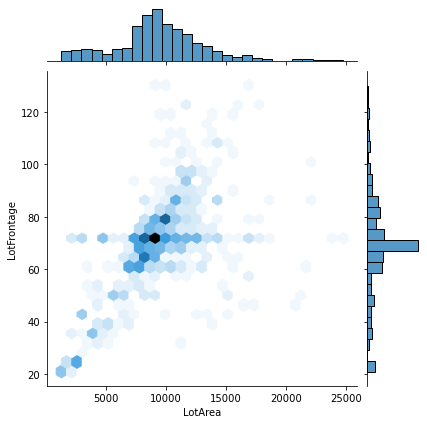

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
housing_train_1=housing_train_1.sort_values(by='SalePrice',ascending=False,axis=0)
hg=housing_train_1.loc[housing_train_1['SalePrice']>=housing_train_1['SalePrice'].quantile(0.9)]
lg=housing_train_1.loc[housing_train_1['SalePrice']<=housing_train_1['SalePrice'].quantile(0.1)]
hg['group']='high'
lg['group']='low'
new=pd.concat([hg,lg]) 
#visualization of clustering algorithm
sns.jointplot(x='LotArea', y='LotFrontage',data=housing_train_1,kind='hex')
print('From this plot we can know the overall distribution of houses')


C:\Users\WENYi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


From this plot we can know the LotArea variable and LotFrontage variable are likely to affect housing price


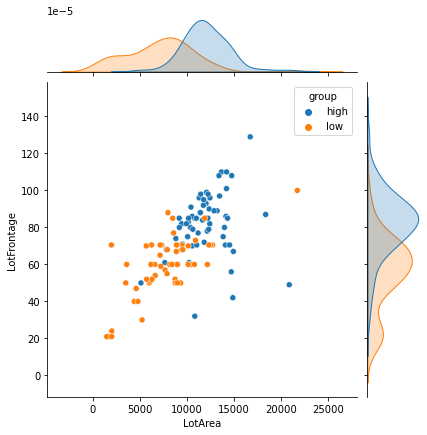

In [3]:
sns.jointplot('LotArea', 'LotFrontage', new,hue='group')
print('From this plot we can know the LotArea variable and LotFrontage variable are likely to affect housing price')

From this plot we can know the MSZoning may be an important factor affecting housing price


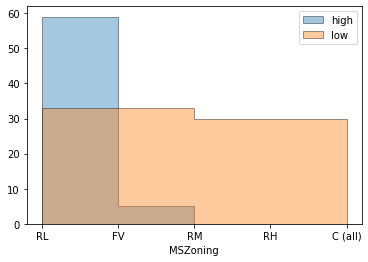

In [4]:
kwargs = dict(histtype='stepfilled', alpha=0.4,edgecolor='black')
ax=plt.axes()
plt.hist(hg['MSZoning'],**kwargs,bins=2)
plt.hist(lg['MSZoning'],**kwargs,bins=2)
ax.set(xlabel='MSZoning')
plt.legend(labels=['high','low'])
print('From this plot we can know the MSZoning may be an important factor affecting housing price')

From this plot we can know the Kitchen Quality and YearBuilt possibly affect housing price


C:\Users\WENYi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


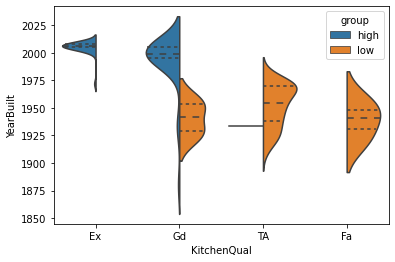

In [5]:
sns.violinplot('KitchenQual','YearBuilt','group',data=new,split=True,inner='quartile')
print('From this plot we can know the Kitchen Quality and YearBuilt possibly affect housing price')

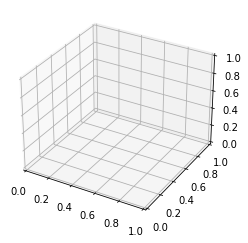

In [6]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

From this plot we can know TotalBsmtSF and OverallQuality may not be key factors affecting housing price


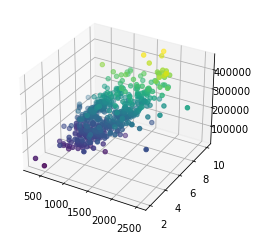

In [7]:
import numpy
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
z=housing_train_1['SalePrice']
x=housing_train_1['TotalBsmtSF']
y=housing_train_1['OverallQual']
ax.scatter(x, y, z,c=z);
print('From this plot we can know TotalBsmtSF and OverallQuality may not be key factors affecting housing price')

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

,var1,var2,var3,var4,SalePrice
0,4216.292816,-19.232829,-349.788027,-1237.364065,451950.0
1,5692.553563,-392.292040,432.233974,-1452.791666,446261.0
2,3213.319067,36.116260,-282.550214,-1279.453536,426000.0
3,11624.259990,-232.471547,-1220.086354,-824.108646,423000.0
4,4436.164496,162.970294,397.378394,-1345.636945,412500.0
...,...,...,...,...,...
625,-3693.433349,-132.407149,417.601069,535.050736,66500.0
626,1364.763482,-254.631918,-53.901246,1081.507610,64500.0
627,-1088.779607,-1202.180451,-88.289625,1153.819391,60000.0
628,192.677081,640.459220,-215.931528,580.485029,60000.0


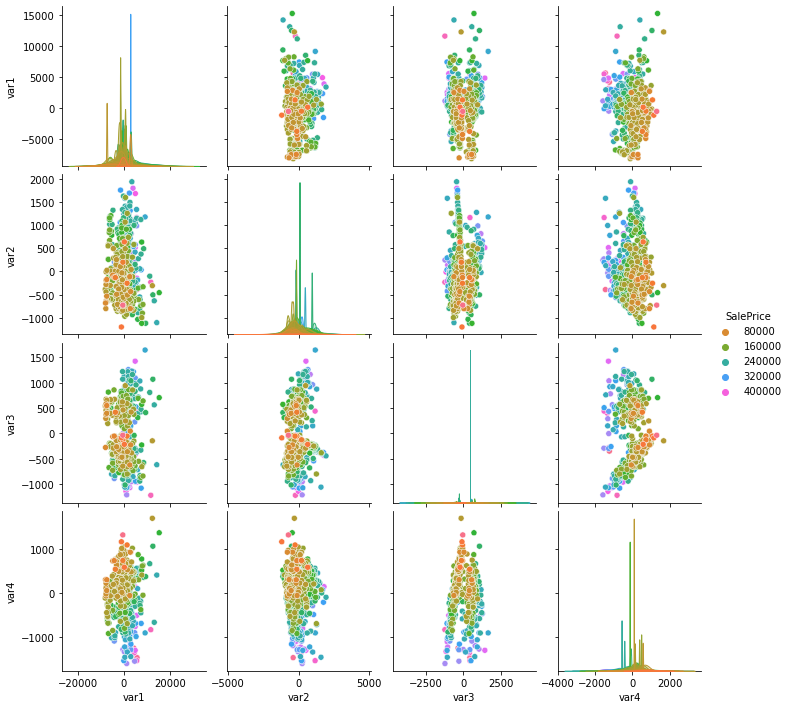

In [8]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA
housing_train_2=housing_train_1.drop(housing_train_1.select_dtypes(include='object'),axis=1)
housing_train_2.reset_index(drop=True, inplace=True)
model=PCA(n_components=4)
x=housing_train_2.drop(['SalePrice'],axis=1)
xtrain=model.fit_transform(x)
xtrain=pd.DataFrame(xtrain,columns=['var1','var2','var3','var4'])
xtrain['SalePrice']=housing_train_2['SalePrice']
sns.pairplot(xtrain,hue='SalePrice',palette='husl')
xtrain

### Module 4: Regression and Prediction
Choose three regression methods and build regression models based on data from `housing_train.csv`, using 5-fold cross-validation. <br>

Further, load `housing_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the mean squared error. Which houses have the worst prediction and what are their characteristics? <br>

Note: we don't deduct points based on accuracy, as long as the models can be fitted correctly and the results are reasonable. However, if the model is wrong and does not yield meaningful and interpretable results, or if the results are interpreted incorrectly and wrong conclusions are drawn, points will be deducted.  

In [9]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
file_path=r'C:\Users\WENYi\Desktop\SDSC2001\housing_test.csv'
housing_test=pd.read_csv(file_path)
housing_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)
housing_test_1 = housing_test.fillna(housing_test.mean())
temnew=housing_test_1.drop(housing_test_1.select_dtypes(include='object'),axis=1)
#data cleaning for test data
temnew
for i in temnew.columns:
    m=housing_test_1[i].quantile(0.2)
    n=housing_test_1[i].quantile(0.8)
    iqr=n-m
    for k in housing_test_1.index:
        if((housing_test_1[i][k]>n+2.5*iqr)|(housing_test_1[i][k]<m-2.5*iqr)):
                housing_test_1[i][k]=np.nan
housing_test_1=housing_test_1.dropna()
housing_test_1.reset_index(drop=True, inplace=True)
housing_test_2=housing_test_1.drop(housing_test_1.select_dtypes(include='object'),axis=1)
x=xtrain.drop('SalePrice',axis=1)
y=xtrain[['SalePrice']]
#dimension reduction for test data
xtest=housing_test_2.drop(['SalePrice'],axis=1)
xtest=model.fit_transform(xtest)
xtest=pd.DataFrame(xtest,columns=['var1','var2','var3','var4'])
ytest=housing_test_2['SalePrice']
#fit model and apply 5-fold validation to see which models are better
model1=LinearRegression()
mymodel1=model1.fit(x,y)
scores1 = cross_val_score(mymodel1, x, y, scoring='r2', cv=5)
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(x,y)
scores2 = cross_val_score(regr, x, y, scoring='r2', cv=5)
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x,y)
scores3 = cross_val_score(neigh, x, y, scoring='r2', cv=5)
iowa_model = DecisionTreeRegressor(random_state=0)
iowa_model.fit(x,y)
scores4 = cross_val_score(iowa_model, x, y, scoring='r2', cv=5)
clf = Ridge(alpha = 0.1)
clf.fit(x,y)
scores5 = cross_val_score(clf, x, y, scoring='r2', cv=5)
print(scores1)
print(scores2)
print(scores3)
print(scores4)
print(scores5)
print('From the result of validation, we pick linear regression, KNeighbors and decision tree model.')

C:\Users\WENYi\AppData\Local\Temp\ipykernel_15212\2852101963.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_test_1 = housing_test.fillna(housing_test.mean())
C:\Users\WENYi\AppData\Local\Temp\ipykernel_15212\2852101963.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_test_1[i][k]=np.nan
C:\Users\WENYi\AppData\Local\Temp\ipykernel_15212\2852101963.py:41: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(x,y)
C:\Users\WENYi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: Dat

[ -1.4367048   -2.92328754 -11.42290892 -14.67387602  -2.60477428]
[ -4.03497421  -6.62105403 -18.68937552  -9.23986112 -10.14051891]
[0.65005046 0.55998921 0.647449   0.58821652 0.4909148 ]
[ -3.96920574 -13.0272619  -30.02711382 -17.88550745  -7.10084915]
[ -1.4367048   -2.92328753 -11.42290891 -14.67387601  -2.60477428]
From the result of validation, we pick linear regression, KNeighbors and decision tree model.


C:\Users\WENYi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\WENYi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\WENYi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\WENYi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return se

In [10]:
##evaluate with test data(score)
score1=model1.score(x,y)
score11=model1.score(xtest,ytest)
print('training set score:',score1,score11)
score3=neigh.score(x,y)
score33=neigh.score(xtest,ytest)
print(score3,score33)

training set score: 0.7550077697096209 -0.7207147369898215
1.0 0.0


In [11]:
#calculate mse,mae
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
ypred=model1.predict(xtest)
mse1=mean_squared_error(ytest,ypred)
mae1=mean_absolute_error(ytest, ypred)
ypred3=neigh.predict(xtest)
mse3=mean_squared_error(ytest,ypred3)
mae3=mean_absolute_error(ytest, ypred3)
print('MSE of linear regression',mse1)
print('MAE of linear regression',mae1)
print('MSE of KNeighbor regression',mse3)
print('MAE of KNeighbor regression',mae3)

MSE of linear regression 10841882057.003387
MAE of linear regression 79250.04122981757
MSE of KNeighbor regression 9200274714.962963
MAE of KNeighbor regression 71880.28148148148


Text(0.5, 1.0, 'plot for KNeighbour regression model')

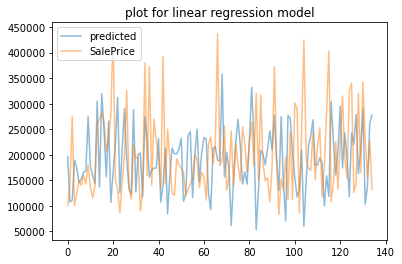

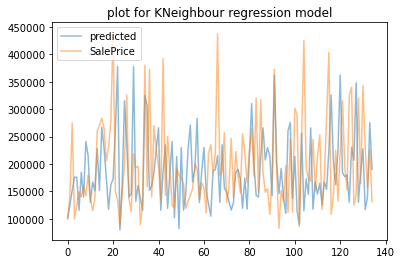

In [15]:
#visualize the result,plot the prediction and the real data to see the difference
Xtest=xtest
Xtest['predicted']=ypred
Xtest['SalePrice']=ytest
Xtest[['predicted','SalePrice']].plot(alpha=0.5)
plt.title('plot for linear regression model')
Xtest['predicted']=ypred3
Xtest['SalePrice']=ytest
Xtest[['predicted','SalePrice']].plot(alpha=0.5)
plt.title('plot for KNeighbour regression model')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
mt1=confusion_matrix(ytest,ypred)
# print(cross_cal_score(lr, X, y, cv=2))

# xtrain['predicted']=model.predict(x)
# xtrain['predicted'][:5]
# print('模型得分为',round(model1.score(xtest,ytest),4))


### Module 5: Summary
Summarize your findings and draw conclusions.


The results shows that the housing price can only be roughly predicted because there are lots of missing values and outliers in the data set, also there are lots of categorical variables which are difficult to transform to number datatypes.The 76 variables are not so independent although they have a strong relationship with housing price.The effect of dimension reduction didn't provide us with desired effect.The KNeighbours regression model has the highest accuracy among all the models.